Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Their are 7 columns with object data type and 4 with float data type and 1 with int data type.

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Their are missing values in 'Item-Weight' and 'Outlet size' column.

In [5]:
df.shape

(8523, 12)

Their are 12 rows and 8523 columns in the dataset.

In [10]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDO19     9
FDD38     9
NCQ06     9
         ..
FDC23     1
FDO33     1
DRF48     1
FDN52     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
df['Item_Weight']=df['Item_Weight'].replace(np.nan,df['Item_Weight'].mean())

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We converted missing values from 'Item_Weight' column to mean of the column.

In [16]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

As their is maximum number of outlet size is Medium, so first we will replace missing values to Medium and then apply further opertaions.

In [17]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Their are no missing values in dataset.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
df['Outlet_Size'].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [23]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [25]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,1,994.7052


In [27]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [28]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [29]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [31]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

From the above observation, we converted maximum columns into int datatype so we can perform further operations.

In [36]:
#Lets drop some columns
df.drop(['Item_Identifier','Item_Type','Outlet_Identifier'],axis=1,inplace=True)

In [37]:
df.shape

(8523, 9)

Now we have 8523 rows and 9 columns

In [39]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [40]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [41]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


Above is the statistical Summary of the dataset.

<AxesSubplot:>

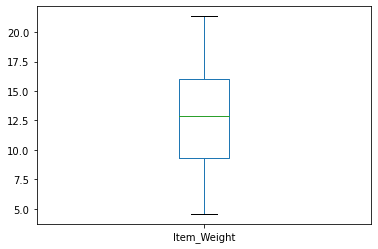

In [43]:
df['Item_Weight'].plot.box()

Their are no outliers in 'Item_Weight' column.

<AxesSubplot:>

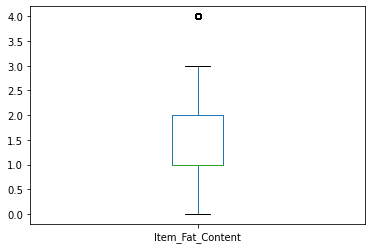

In [44]:
df['Item_Fat_Content'].plot.box()

As this is object data type originally, we can not remove outliers.

<AxesSubplot:>

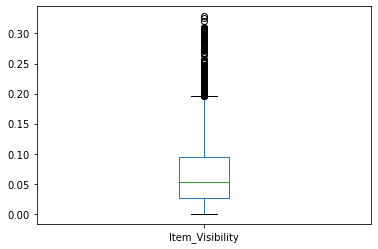

In [45]:
df['Item_Visibility'].plot.box()

Their are outliers in above column.

<AxesSubplot:>

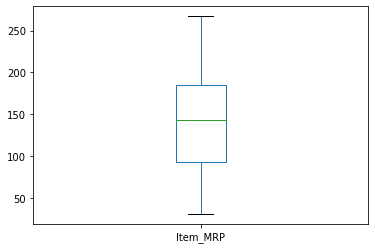

In [46]:
df['Item_MRP'].plot.box()

No outliers are there.

<AxesSubplot:>

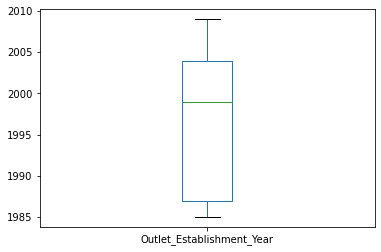

In [47]:
df['Outlet_Establishment_Year'].plot.box()

Their are no outliers present here.

<AxesSubplot:>

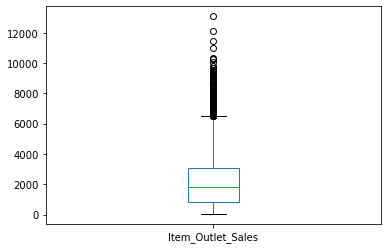

In [48]:
df['Item_Outlet_Sales'].plot.box()

Their are outliers in this column.

lets check the disrtibution of 'Item_Outlet_Sales' and 'Item_Visibility column' for removing outliers.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

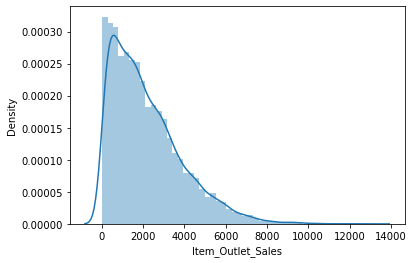

In [50]:
sns.distplot(df['Item_Outlet_Sales'])

Data is not normally distributed here.

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

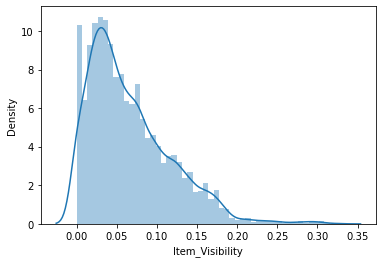

In [51]:
sns.distplot(df['Item_Visibility'])

Data is not normally distributed.

In [52]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [54]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [55]:
#lets compute IQR to calculate boundaries

In [56]:
IQR=df.Item_Visibility.quantile(0.75)-df.Item_Visibility.quantile(0.25)
IQR

0.067595815

In [57]:
#Extreme Outliers
lower_bridge=df['Item_Visibility'].quantile(0.25)-(IQR*3)
upper_bridge=df['Item_Visibility'].quantile(0.75)+(IQR*3)

In [58]:
print(lower_bridge)
print(upper_bridge)

-0.1757979675
0.29737273750000004


In [59]:
df.loc[df['Item_Visibility']>=0.30,'Item_Visibility']=0.30

In [63]:
df['Item_Visibility'].max()

0.3

In [106]:
IQR=df.Item_Outlet_Sales.quantile(0.75)-df.Item_Outlet_Sales.quantile(0.25)
IQR

2267.049

In [107]:
#Extreme Outliers
lower_bridge=df['Item_Outlet_Sales'].quantile(0.25)-(IQR*3)
upper_bridge=df['Item_Outlet_Sales'].quantile(0.75)+(IQR*3)

In [108]:
print(lower_bridge)
print(upper_bridge)

-5966.8996
9902.4434


In [109]:
df.loc[df['Item_Outlet_Sales']>=9903,'Item_Visibility']=9903

In [66]:
#Lets check the correlation

In [110]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,0.001804,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.000274,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,0.001804,0.000274,1.000000,0.051683,-0.046082,-0.015094,0.033454,0.059579,0.159546
Item_MRP,0.024756,-0.000876,0.051683,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.046082,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,-0.015094,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,0.033454,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,0.059579,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,0.159546,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


From the above observation, variables are positively as well as negatively correlated.

<AxesSubplot:>

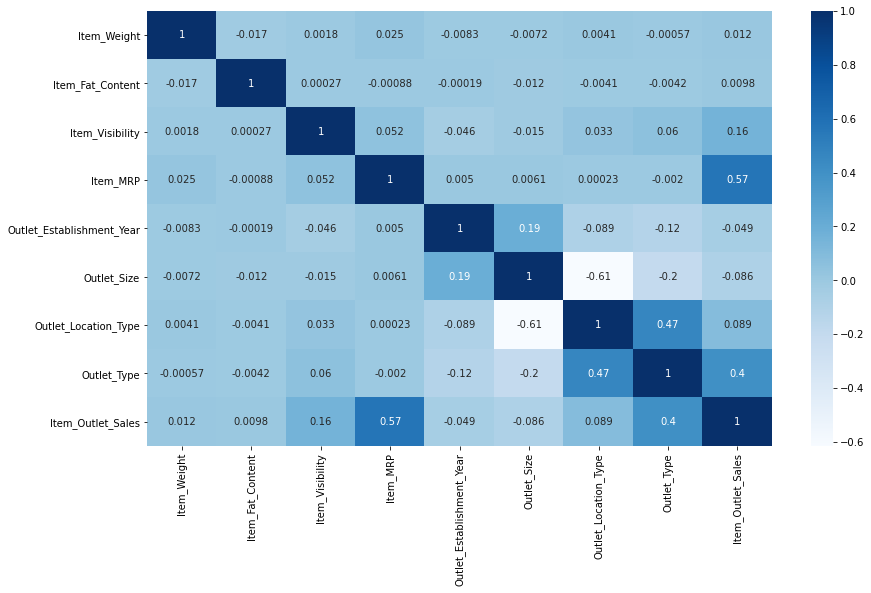

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=[14,8])
sns.heatmap(dfcor,cmap='Blues',annot=True)

From the above observation, variables are positively as well as negatively correlated.

In [112]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

lets check ditribution to check skewness 

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

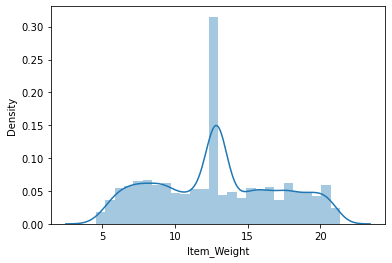

In [113]:
sns.distplot(df['Item_Weight'])

Data is normally distributed with very less skewness

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

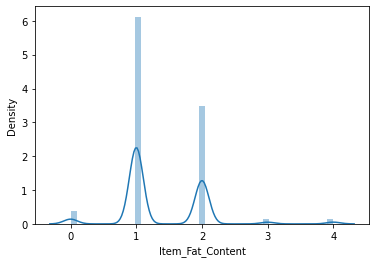

In [114]:
sns.distplot(df['Item_Fat_Content'])

Data is normally distributed with very less skewness

lets split the dataset into dependent and independent varibale.

In [115]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [116]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,249.8092,1999,1,0,1
1,5.920,2,0.019278,48.2692,2009,1,2,2
2,17.500,1,0.016760,141.6180,1999,1,0,1
3,19.200,2,0.000000,182.0950,1998,1,2,0
4,8.930,1,0.000000,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1987,0,2,1
8519,8.380,2,0.046982,108.1570,2002,1,1,1
8520,10.600,1,0.035186,85.1224,2004,2,1,1
8521,7.210,2,0.145221,103.1332,2009,1,2,2


In [117]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [118]:
x.skew()

Item_Weight                   0.090561
Item_Fat_Content              0.994824
Item_Visibility              32.599845
Item_MRP                      0.127202
Outlet_Establishment_Year    -0.396641
Outlet_Size                  -0.087072
Outlet_Location_Type         -0.209093
Outlet_Type                   0.927438
dtype: float64

Their are some columns in which skewness is present.

In [119]:
from sklearn.preprocessing import power_transform

In [120]:
X_new=power_transform(x)
X_new=pd.DataFrame(X,columns=x.columns)

In [121]:
X_new.skew()

Item_Weight                 -0.068024
Item_Fat_Content             0.032643
Item_Visibility              0.124285
Item_MRP                    -0.115386
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

Skewness successfully removed.

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc=StandardScaler()

In [124]:
X=sc.fit_transform(X_new)
X

array([[-0.82263635, -0.52097741, -1.14687031, ..., -0.29329517,
        -1.37384276, -0.12348771],
       [-1.73380133,  1.00987141, -1.03711349, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 1.08636176, -0.52097741, -1.12236546, ..., -0.29329517,
        -1.37384276, -0.12348771],
       ...,
       [-0.49655592, -0.52097741, -0.54308772, ...,  1.390694  ,
        -0.13111325, -0.12348771],
       [-1.37344321,  1.00987141,  1.46035422, ..., -0.29329517,
         1.08832445,  1.04059102],
       [ 0.49178563, -0.52097741, -0.2763266 , ...,  1.390694  ,
        -1.37384276, -0.12348771]])

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [126]:
#finding best random_state
maxr2_score=0
maxRs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    pred=LR.predict(X_test)
    r_2=r2_score(y_test,pred)
    if r_2>maxr2_score:
    
        maxr2_score=r_2
        maxRs=i
        
print("Best r2_score is", maxr2_score,"on Random state", maxRs)    

Best r2_score is 0.5481531405469842 on Random state 178


In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=178)

In [128]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print(r2_score(y_test,pred))
print(LR.score(X_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5481531405469842
0.5115617576494618
1334104.8813760222
Root mean squared Error: 1155.0345801646038


In [129]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(r2_score(y_test,pred))
print(dt.score(X_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.23533145610456485
1.0
2257729.617243633
Root mean squared Error: 1502.5743300228555


In [104]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(r2_score(y_test,pred))
print(rf.score(X_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5386662067175652
0.9372179032586672
1335349.9665373275
Root mean squared Error: 1155.57343623732


In [105]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
print(r2_score(y_test,pred))
print(rf.score(X_train,y_train))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.009508562112641283
0.9372179032586672
2867018.9084298187
Root mean squared Error: 1693.227364658928


In [130]:
#Hyper Parameter Tuning for RandomForestRegressor

In [131]:
parameters={'n_estimators':[100],
           'max_features':['auto'],
           'max_depth':[4,5,6,7,8],
           'criterion':['mse']}

In [132]:
GCV_rf=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV_rf.fit(X_train,y_train)
GCV_rf.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [134]:
RF_model=RandomForestRegressor(criterion='mse',max_depth=5,max_features='auto',n_estimators=100)
RF_model.fit(X_train,y_train)
pred=RF_model.predict(X_test)
print(r2_score(y_test,pred))

0.6326242442966066


In [136]:
#Model Saving

import joblib
joblib.dump(RF_model,"Bigdata.pkl")

['Bigdata.pkl']

In [139]:
#Model Loding
B_Model=joblib.load("Bigdata.pkl")

In [140]:
prediction=B_Model.predict(X_test)
prediction

array([ 268.79239271, 2577.69862363, 3632.64723643, ..., 2547.56822416,
        590.80389097, 1603.07020594])